In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Parameter konfigurasi
learning_rate = 0.001
batch_size = 16
image_size = (128, 128)
epochs = 10

In [3]:
# Dataset directory
train_dir = 'dataset/train'
val_dir = 'dataset/val'

In [4]:
# Data augmentation dan preprocessing
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 3500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [5]:
# Membangun model CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')  # 5 kelas
])

c:\Users\zarfa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile model
optimizer = optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Train model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

Epoch 1/10


c:\Users\zarfa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


219/219 ━━━━━━━━━━━━━━━━━━━━ 40s 174ms/step - accuracy: 0.2905 - loss: 1.5592 - val_accuracy: 0.4540 - val_loss: 1.2588
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 35s 156ms/step - accuracy: 0.4767 - loss: 1.2802 - val_accuracy: 0.5480 - val_loss: 1.0879
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 36s 162ms/step - accuracy: 0.5198 - loss: 1.1944 - val_accuracy: 0.6000 - val_loss: 0.9912
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 35s 157ms/step - accuracy: 0.5713 - loss: 1.0887 - val_accuracy: 0.6640 - val_loss: 0.8977
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 36s 161ms/step - accuracy: 0.5868 - loss: 1.0380 - val_accuracy: 0.6620 - val_loss: 0.8634
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 35s 157ms/step - accuracy: 0.6046 - loss: 1.0026 - val_accuracy: 0.6540 - val_loss: 0.8523
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 33s 147ms/step - accuracy: 0.6044 - loss: 0.9926 - val_accuracy: 0.7200 - val_loss: 0.7784
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 33s 147ms/step - accuracy: 0.6348 - loss: 0.9356 - val

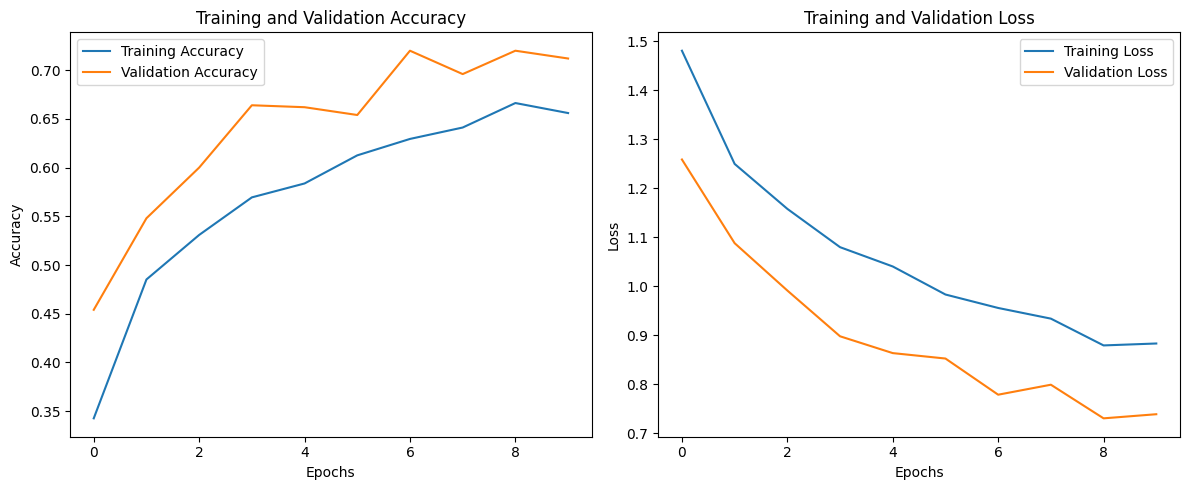

In [8]:
# Menampilkan grafik akurasi dan loss
plt.figure(figsize=(12, 5))

# Grafik Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Grafik Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
# Menyimpan model
model.save('furniture_model.h5')
print("Model telah disimpan!")

Model telah disimpan!


In [10]:
# Evaluasi model
val_generator.reset()
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step


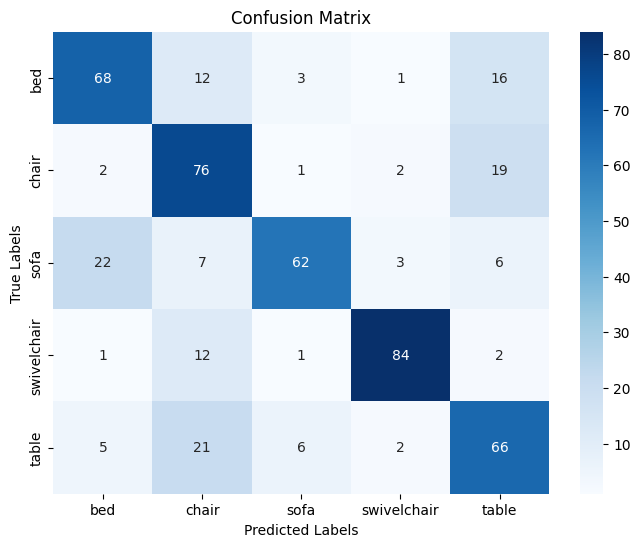

In [11]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [12]:
# Classification Report
class_report = classification_report(y_true, y_pred_classes, target_names=train_generator.class_indices.keys())
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

         bed       0.69      0.68      0.69       100
       chair       0.59      0.76      0.67       100
        sofa       0.85      0.62      0.72       100
 swivelchair       0.91      0.84      0.88       100
       table       0.61      0.66      0.63       100

    accuracy                           0.71       500
   macro avg       0.73      0.71      0.72       500
weighted avg       0.73      0.71      0.72       500



Found 100 images belonging to 5 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


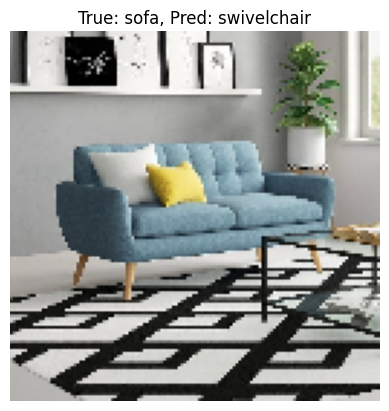

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


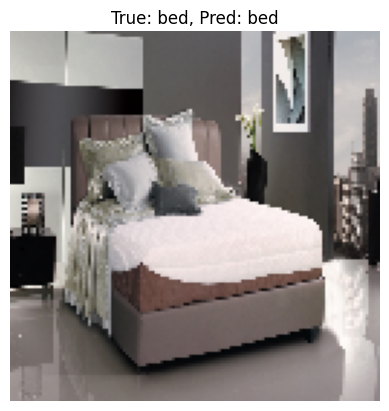

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


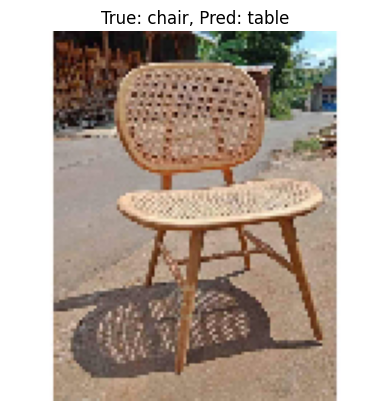

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


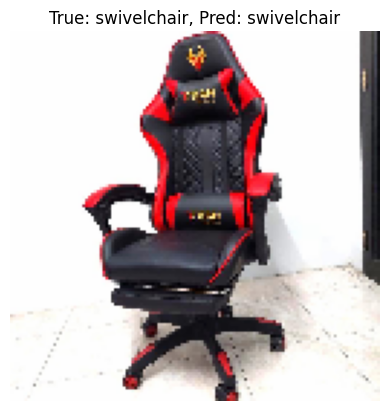

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


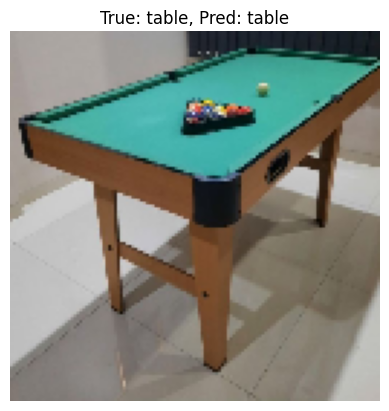

In [13]:
# Prediksi sampel gambar dari data test (5 gambar dari kelas berbeda)
def plot_sample_predictions(generator, model, class_indices, num_samples=5):
    import random
    
    # Konversi indeks ke nama kelas
    idx_to_class = {v: k for k, v in class_indices.items()}

    # Kumpulkan sampel unik dari kelas yang berbeda
    unique_classes = list(class_indices.values())
    samples = []
    
    while len(samples) < num_samples:
        x_batch, y_batch = next(generator)
        for i in range(len(x_batch)):
            true_label = np.argmax(y_batch[i])
            if true_label in unique_classes:
                samples.append((x_batch[i], true_label))
                unique_classes.remove(true_label)
            if len(samples) == num_samples:
                break

    # Plot setiap sampel
    for sample_image, true_label in samples:
        # Prediksi model
        pred_probs = model.predict(sample_image[np.newaxis, ...])
        pred_label = np.argmax(pred_probs)

        # Konversi indeks ke nama kelas
        true_label_name = idx_to_class[true_label]
        pred_label_name = idx_to_class[pred_label]

        # Plot gambar
        plt.figure()
        plt.imshow(sample_image)
        plt.title(f"True: {true_label_name}, Pred: {pred_label_name}")
        plt.axis('off')
        plt.show()

# Gunakan fungsi untuk memprediksi dan menampilkan sampel dari data test
test_generator = val_datagen.flow_from_directory(
    'dataset/test',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

plot_sample_predictions(test_generator, model, train_generator.class_indices)